In [1]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_path = '/content/drive/MyDrive/liar/train.tsv'
valid_path = '/content/drive/MyDrive/liar/valid.tsv'
test_path = '/content/drive/MyDrive/liar/test.tsv'

train_df = pd.read_csv(train_path,delimiter='\t',header=None, names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
val_df = pd.read_csv(valid_path,delimiter='\t',header=None, names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
test_df = pd.read_csv(test_path,delimiter='\t',header=None, names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
train_df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


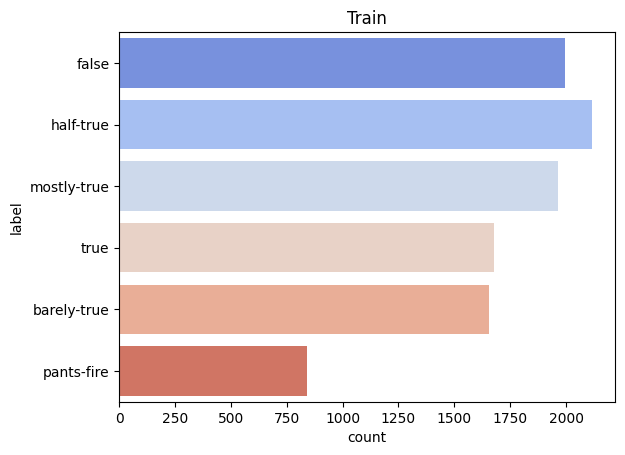

In [2]:
sns.countplot(y="label", palette="coolwarm", data=train_df).set_title('Train')
plt.show()

In [3]:
print(train_df.shape)
train_df.isna().sum()

(10240, 14)


id                    0
label                 0
statement             0
subject               2
speaker               2
job                2897
state              2208
party                 2
barely_true_c         2
false_c               2
half_true_c           2
mostly_true_c         2
pants_on_fire_c       2
venue               102
dtype: int64

In [4]:
print(val_df.shape)
val_df.isna().sum()

(1284, 14)


id                   0
label                0
statement            0
subject              0
speaker              0
job                345
state              279
party                0
barely_true_c        0
false_c              0
half_true_c          0
mostly_true_c        0
pants_on_fire_c      0
venue               12
dtype: int64

In [5]:
print(test_df.shape)
test_df.isna().sum()

(1267, 14)


id                   0
label                0
statement            0
subject              0
speaker              0
job                325
state              262
party                0
barely_true_c        0
false_c              0
half_true_c          0
mostly_true_c        0
pants_on_fire_c      0
venue               17
dtype: int64

In [6]:
from sklearn.utils import shuffle

train_df = train_df[['statement','label']]
val_df = val_df[['statement','label']]
test_df = test_df[['statement','label']]
# Shuffle
train_df = shuffle(train_df).reset_index(drop=True)
val_df = shuffle(val_df).reset_index(drop=True)
test_df = shuffle(test_df).reset_index(drop=True)

def convert_to_int(value):
    if value in ['half-true', 'mostly-true', 'true']:
        return 1
    elif value in ['barely-true', 'false', 'pants-fire']:
        return 0
    else:
        return value
# def convert_to_int(value):
#     if value in [ 'half-true', 'mostly-true', 'true']:
#         return 1
#     elif value in ['false', 'pants-fire','barely-true']:
#         return 0
#     else:
#         return value


train_df['label']=train_df['label'].apply(convert_to_int)
val_df['label']=val_df['label'].apply(convert_to_int)
test_df['label']=test_df['label'].apply(convert_to_int)

train_df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
val_df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
test_df.drop_duplicates(subset=['statement'],keep='first',inplace=True)

# df = pd.concat([train_df, valid_df, test_df]).reset_index(drop=True)

In [7]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [8]:
!pip install transformers
import torch
from transformers import BertTokenizer
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# from torch.utils.data import Dataset
# from transformers import BertTokenizer
# class TextDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_length=512):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         label = self.labels[idx]

#         inputs = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_length,
#             padding='max_length',
#             truncation=True, 
#             return_tensors='pt'
#         )

#         return {
#             'input_ids': inputs['input_ids'].squeeze(0),
#             'token_type_ids': inputs['token_type_ids'].squeeze(0),
#             'attention_mask': inputs['attention_mask'].squeeze(0),
#             'label': torch.tensor(label)
#         }

In [10]:


# tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

# train_texts = train_df['statement'].tolist()
# train_labels = train_df['label'].tolist()

# val_texts = val_df['statement'].tolist()
# val_labels = val_df['label'].tolist()

# test_texts = test_df['statement'].tolist()
# test_labels = test_df['label'].tolist()

# max_length = 512

# train_df = TextDataset(train_texts, train_labels, tokenizer, max_length=max_length)
# val_df = TextDataset(val_texts, val_labels, tokenizer, max_length=max_length)
# test_df = TextDataset(test_texts, test_labels, tokenizer, max_length=max_length)

In [11]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer, max_length=512):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
        self.max_length = max_length

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)

        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        statement = statement[:self.max_length - 2]
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)

        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
max_length = 512
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer, max_length=max_length)
valset = FakeNewsDataset('val', tokenizer=tokenizer, max_length=max_length)
testset = FakeNewsDataset('test', tokenizer=tokenizer, max_length=max_length)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 10223
valset size: 1284
testset size:  1267


In [12]:
sample_idx = 0

statement,label = trainset.df.iloc[sample_idx].values

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
The United States has the highest corporate tax rate in the free world.

tokens: 
['[CLS]', 'the', 'united', 'states', 'has', 'the', 'highest', 'corporate', 'tax', 'rate', 'in', 'the', 'free', 'world', '.', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([ 101, 1996, 2142, 2163, 2038, 1996, 3284, 5971, 4171, 3446, 1999, 1996,
        2489, 2088, 1012,  102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
1




In [13]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)

    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [14]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

In [15]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2


model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)
    # PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS, hidden_dropout_prob=dropout_rate)

clear_output()

In [16]:
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import time
import torch.optim as optim
from transformers import get_linear_schedule_with_warmup

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
NUM_EPOCHS = 3
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = len(trainloader) * NUM_EPOCHS)

start_time = time.time()
for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors,token_type_ids=segments_tensors, attention_mask=masks_tensors, labels=labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)
        scheduler.step()

end_time = time.time()
training_time = end_time - start_time

device: cuda:0


  0%|          | 0/639 [00:00<?, ?it/s]

  0%|          | 0/639 [00:00<?, ?it/s]

  0%|          | 0/639 [00:00<?, ?it/s]

In [17]:
torch.save(model, './best_model.pth')

BERT Model Accuracy :  0.6361483820047356
Precision :  0.6476079346557759
Recall :  0.7773109243697479
F1 :  0.7065563335455123
G-mean: 0.5939798067950639
Training time:  337.7861592769623
Inference time:  4.745889902114868
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       553
           1       0.65      0.78      0.71       714

    accuracy                           0.64      1267
   macro avg       0.63      0.62      0.61      1267
weighted avg       0.63      0.64      0.63      1267



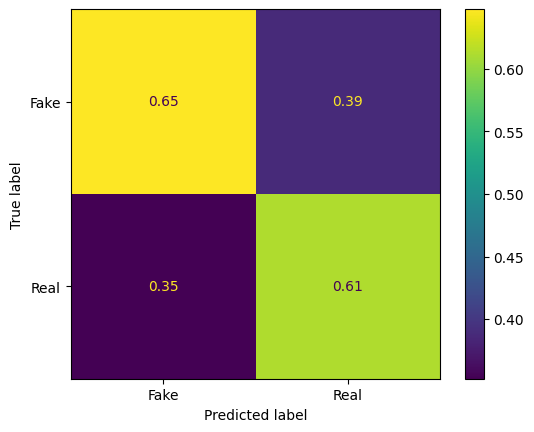

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.metrics import geometric_mean_score
true=[]
predictions=[]
start_time = time.time()
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
       
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())

end_time = time.time()
inference_time = end_time - start_time
cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')

accuracy = accuracy_score(true, predictions)

g_mean = geometric_mean_score(true, predictions)
print("BERT Model Accuracy : ", accuracy)
print("Precision : ", precision_score(true, predictions))
print("Recall : ", recall_score(true, predictions))
print("F1 : ", f1_score(true, predictions))
print("G-mean:", g_mean)
print("Training time: ", training_time)
print("Inference time: ", inference_time)
print(classification_report(true, predictions))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','Real'])
disp.plot()